/Users/heliaguin/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (12,13,76,77,78,94,178) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/heliaguin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater_equal
/Users/heliaguin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less


Index(['user_id', 'cond', 'training', 'smse'], dtype='object')
[2 1 4]
['b' 'a' 'c']
2 b


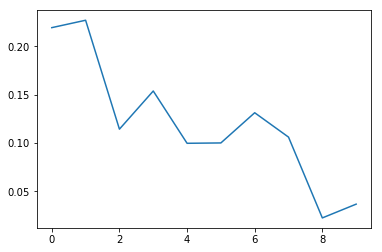

2 a


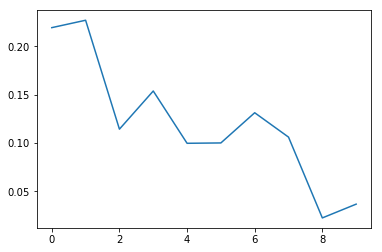

2 c


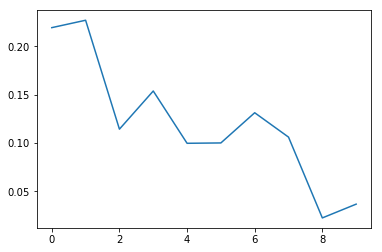

1 b


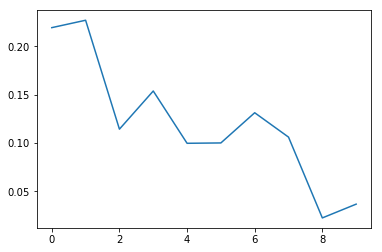

1 a


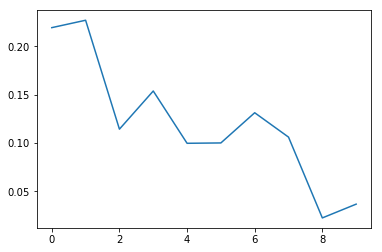

1 c


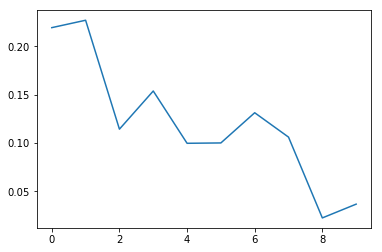

4 b


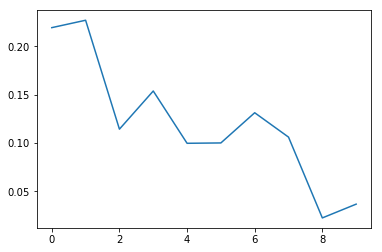

4 a


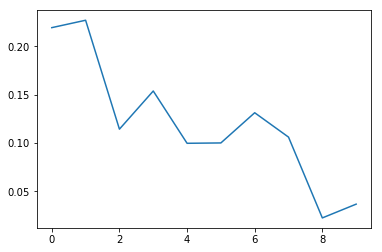

4 c


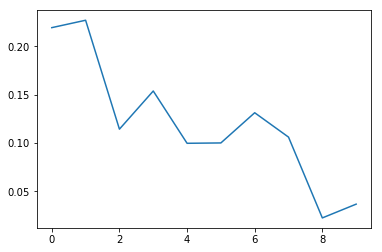

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

backgr = pd.read_csv('user_data_mse.csv')
scores = pd.read_csv('cs236user.csv', sep='\t', lineterminator='\n')
#for i in backgr.columns:
#    print(i)

print(scores.columns)

backgr = backgr[['userid', 'raven_score_yr123', "raven_adjusted_score"]]

conds = scores.cond.unique()
trains = scores.training.unique()

#scores.user_id = np.array(scores.user_id, dtype=int)

print(conds)
print(trains)

#print(scores.head)
#print(backgr.head)
#print(backgr.raven_score_yr123, backgr.raven_adjusted_score)
merged = pd.merge(scores, backgr, left_on=['user_id'], right_on=['userid'], how='inner')


#sprint(merged.head)
for cond in conds:
    for train in trains:
        print(cond, train)
        cond_list = (merged['cond'] == cond)
        train_list = (merged['training'] == train)
        condition = train_list | 1 # & cond_list & 
        mse = merged[condition].smse
        raven_score = merged[condition].raven_score_yr123.values
        raven_adjust = merged[condition].raven_adjusted_score.values
        raven = raven_adjust
        slots = 10
        avg_mse = np.zeros(slots)
        for i in range(slots):
            avg_mse[i] = np.mean(mse[(raven >= i/slots) & (raven < (i+1)/slots)])
        
        
        plt.figure(np.random.randint(100))
        plt.plot( avg_mse)
        plt.show()
        plt.close('All')
        